In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d albertovidalrod/electricity-consumption-uk-20092022

 26% 5.00M/19.2M [00:00<00:00, 34.5MB/s]
100% 19.2M/19.2M [00:00<00:00, 86.7MB/s]


In [6]:
! unzip electricity-consumption-uk-20092022.zip

Archive:  electricity-consumption-uk-20092022.zip
  inflating: historic_demand_2009_2024.csv  
  inflating: historic_demand_2009_2024_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  
  inflating: historic_demand_year_2024.csv  


In [7]:
!kaggle datasets download -d sercandikici/london-weather-database-from-2009-to-2024

  0% 0.00/301k [00:00<?, ?B/s]
100% 301k/301k [00:00<00:00, 106MB/s]


In [8]:
! unzip london-weather-database-from-2009-to-2024.zip

Archive:  london-weather-database-from-2009-to-2024.zip
  inflating: London_2009_to_2024_forecast.csv  


In [9]:
!pip install gluonts
!pip install "gluonts[torch]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 20.8 MB/s eta 0:00:00


In [10]:
import numpy as np
np.bool = np.bool_

In [11]:
pip install mxnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [12]:
pip install mxnet --upgrade

In [13]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon
import json

In [14]:
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import Evaluator

import torch
from gluonts.mx import DeepAREstimator
from gluonts.mx.trainer import Trainer

/usr/local/lib/python3.10/dist-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


This is an experiment, I am going to use 3 years of data 2009,2010,2011


In [15]:
df_raw = pd.read_csv("historic_demand_2009_2024_noNaN.csv")
df_raw.head()

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


In [16]:
df_weather = pd.read_csv("London_2009_to_2024_forecast.csv")
df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,London,2009-01-01,2.7,0.0,1.2,0.6,-3.0,-1.0,-1.2,84.0,...,NaN,NaN,NaN,2009-01-01T08:06:15,2009-01-01T16:02:16,0.17,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03660099999,03672099999,0378109999..."
1,London,2009-01-02,4.6,-0.6,2.1,1.3,-3.6,-0.6,-0.5,83.4,...,NaN,NaN,NaN,2009-01-02T08:06:07,2009-01-02T16:03:21,0.20,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"03769099999,03660099999,03672099999,0378109999..."
2,London,2009-01-03,3.0,-4.9,-1.7,2.2,-7.1,-3.0,-5.2,78.3,...,NaN,NaN,NaN,2009-01-03T08:05:55,2009-01-03T16:04:29,0.24,Clear,Clear conditions throughout the day.,clear-day,"03769099999,03660099999,03672099999,0378109999..."
3,London,2009-01-04,0.1,-5.8,-2.6,-2.5,-8.9,-4.7,-4.5,87.0,...,NaN,NaN,NaN,2009-01-04T08:05:40,2009-01-04T16:05:39,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,03660099999,03672099999,0378109999..."
4,London,2009-01-05,1.8,-2.0,0.0,-2.7,-6.8,-4.2,-2.8,82.3,...,NaN,NaN,NaN,2009-01-05T08:05:22,2009-01-05T16:06:52,0.31,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"03769099999,03660099999,03672099999,0378109999..."


In [17]:
df3_year = df_raw[["settlement_date","tsd"]]
df3_year = df3_year[(df3_year["settlement_date"] >= "2009-01-01 00:00:00")&(df3_year["settlement_date"] <= "2011-12-31 23:30:00")]
df3_year

,settlement_date,tsd
0,2009-01-01 00:00:00,38704
1,2009-01-01 00:30:00,38964
2,2009-01-01 01:00:00,38651
3,2009-01-01 01:30:00,37775
4,2009-01-01 02:00:00,37298
...,...,...
52261,2011-12-31 21:30:00,31982
52262,2011-12-31 22:00:00,31145
52263,2011-12-31 22:30:00,30803
52264,2011-12-31 23:00:00,30441


In [18]:
df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])
df3_year['settlement_date'] = df3_year['settlement_date'].dt.floor('D')
df3_year

<ipython-input-18-e81cd3b80d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])


,settlement_date,tsd
0,2009-01-01,38704
1,2009-01-01,38964
2,2009-01-01,38651
3,2009-01-01,37775
4,2009-01-01,37298
...,...,...
52261,2011-12-31,31982
52262,2011-12-31,31145
52263,2011-12-31,30803
52264,2011-12-31,30441


In [19]:
daily = df3_year.groupby('settlement_date').agg({'tsd': 'mean'}).reset_index()
daily

,settlement_date,tsd
0,2009-01-01,38528.395833
1,2009-01-02,41133.458333
2,2009-01-03,40667.791667
3,2009-01-04,41013.958333
4,2009-01-05,47322.312500
...,...,...
1084,2011-12-27,33447.875000
1085,2011-12-28,35252.062500
1086,2011-12-29,36492.541667
1087,2011-12-30,37148.395833


In [20]:
df = daily.copy()
df

,settlement_date,tsd
0,2009-01-01,38528.395833
1,2009-01-02,41133.458333
2,2009-01-03,40667.791667
3,2009-01-04,41013.958333
4,2009-01-05,47322.312500
...,...,...
1084,2011-12-27,33447.875000
1085,2011-12-28,35252.062500
1086,2011-12-29,36492.541667
1087,2011-12-30,37148.395833


In [21]:
df = df.set_index("settlement_date")
df

,tsd
settlement_date,
2009-01-01,38528.395833
2009-01-02,41133.458333
2009-01-03,40667.791667
2009-01-04,41013.958333
2009-01-05,47322.312500
...,...
2011-12-27,33447.875000
2011-12-28,35252.062500
2011-12-29,36492.541667


In [22]:
split_date= "2011-09-01"

train_data = df[df.index < split_date]
test_data = df[df.index >= split_date]
print(train_data.shape)
print(test_data.shape)

(967, 1)
(122, 1)


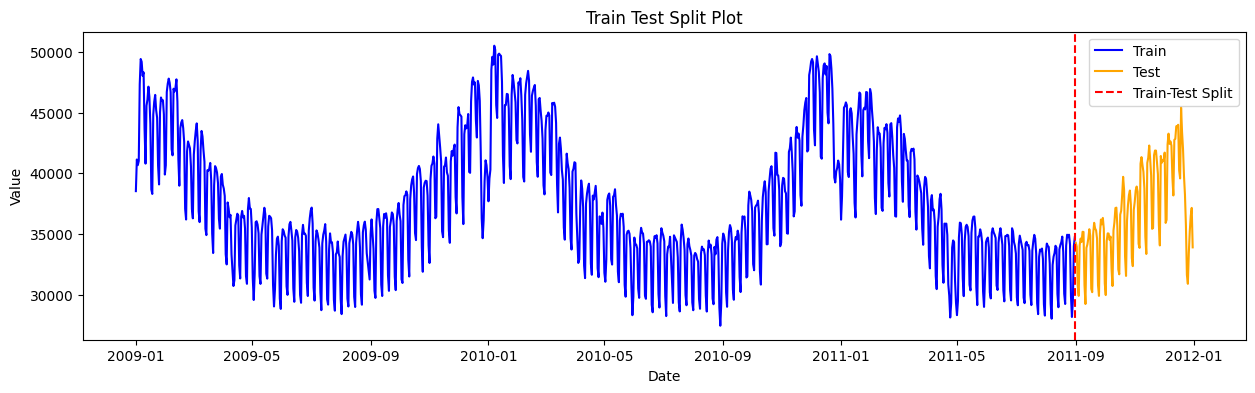

In [23]:
plt.figure(figsize=(15,4))
plt.plot(train_data.index,train_data["tsd"],color="blue", label="Train")
plt.plot(test_data.index,test_data["tsd"], color="orange", label="Test")
plt.axvline(train_data.index[-1], color="red", linestyle="--", label="Train-Test Split")

plt.title('Train Test Split Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [24]:
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import Evaluator

In [25]:
freq = "D"
prediction_length = 30
estimator = DeepAREstimator (freq=freq,
                             context_length=720, #how much previous observation we need to take to predict future events
                             prediction_length=prediction_length,
                             num_layers=3,
                             num_cells=64,
                             trainer= Trainer(epochs=5))

In [26]:
train_ds = ListDataset(
    [{"start":train_data.index[0],
      "target":train_data.tsd}],
    freq=freq
)


test_ds = ListDataset(
    [{"start":test_data.index[0],
      "target":test_data.tsd}],
    freq=freq
)

In [27]:
predictor_1 = estimator.train(training_data=train_ds) #predicting 30 days

100%|██████████| 50/50 [03:38<00:00,  4.38s/it, epoch=5/5, avg_epoch_loss=8.78]


In [28]:
from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset = test_ds,
    predictor=predictor_1,
    num_samples=100
)

In [29]:
forecasts = list(forecast_it)
tss = list(ts_it)

from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics_1, item_metrics_1 = evaluator(iter(tss), iter(forecasts))

Running evaluation: 1it [00:00, 15.42it/s]


In [30]:
agg_metrics_1

{'MSE': 12488542.933333334,
 'abs_error': 71271.234375,
 'abs_target_sum': 1184883.75,
 'abs_target_mean': 39496.125,
 'seasonal_error': 1861.981456043956,
 'MASE': 1.2759030466111774,
 'MAPE': 0.0655648668607076,
 'sMAPE': 0.061777345339457196,
 'MSIS': 16.537392813472295,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 58091.381640625004,
 'Coverage[0.1]': 0.23333333333333334,
 'QuantileLoss[0.5]': 71271.240234375,
 'Coverage[0.5]': 0.5333333333333333,
 'QuantileLoss[0.9]': 26236.986328124996,
 'Coverage[0.9]': 0.8333333333333334,
 'RMSE': 3533.9132605842683,
 'NRMSE': 0.08947493610029511,
 'ND': 0.06015040241289494,
 'wQuantileLoss[0.1]': 0.04902707260575141,
 'wQuantileLoss[0.5]': 0.06015040735800031,
 'wQuantileLoss[0.9]': 0.02214308899765483,
 'mean_absolute_QuantileLoss': 51866.53606770834,
 'mean_wQuantileLoss': 0.04377352298713552,
 'MAE_Coverage': 0.3777777777777778,
 'OWA': nan}

In [31]:
mape_1 = round(agg_metrics_1['MAPE'],3)
smape_1 = round(agg_metrics_1['sMAPE'],3)
print(f"MAPE: {mape_1}")
print(f"sMAPE: {smape_1}")

MAPE: 0.066
sMAPE: 0.062


In [32]:
forecasts[0]

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[49337.348, 35841.94 , 37218.773, ..., 45914.938, 43946.12 ,
        38057.4  ],
       [40808.863, 33987.938, 35358.344, ..., 37406.977, 37807.047,
        33849.91 ],
       [40599.996, 36353.6  , 36855.625, ..., 41029.72 , 41812.46 ,
        35653.36 ],
       ...,
       [40267.02 , 35770.61 , 36812.96 , ..., 40593.297, 36285.863,
        35951.117],
       [40797.727, 33786.95 , 36668.223, ..., 41179.453, 37255.555,
        34736.996],
       [36953.715, 35512.176, 35406.516, ..., 39330.465, 40046.99 ,
        34847.277]], dtype=float32), start_date=Period('2011-12-02', 'D'))

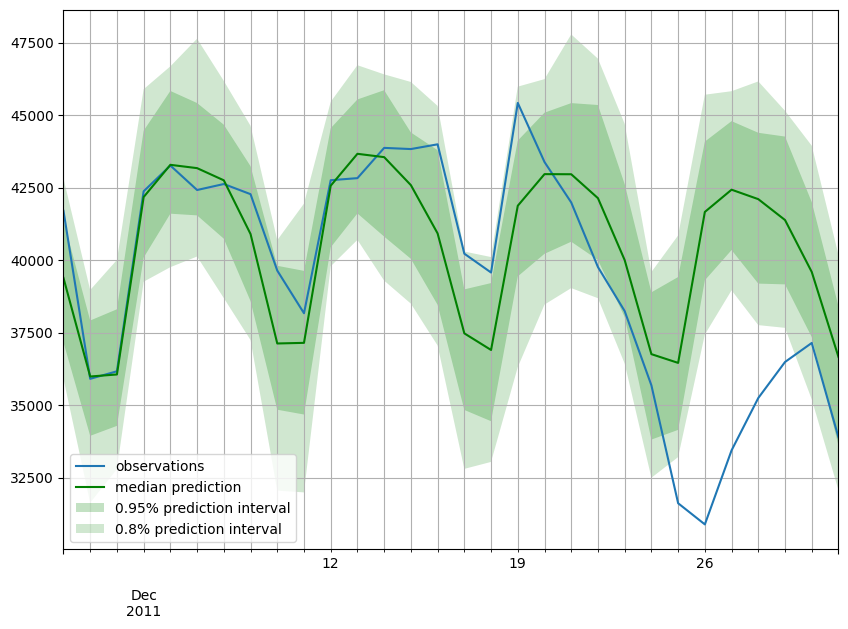

In [33]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_length
    prediction_intervals = (0.8, 0.95)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)
    forecast_entry.plot(intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="lower left")
    plt.show()


plot_prob_forecasts(tss[0], forecasts[0])

adding one regressor, just holiday as categorical value

With regressors , first with holiday

In [34]:
df3_year_w_holiday = df_raw[["settlement_date","tsd","is_holiday"]]
df3_year_w_holiday = df3_year_w_holiday[(df3_year_w_holiday["settlement_date"] >= "2009-01-01 00:00:00")&(df3_year_w_holiday["settlement_date"] <= "2011-12-31 23:30:00")]
df3_year_w_holiday["settlement_date"] = pd.to_datetime(df3_year_w_holiday["settlement_date"])
df3_year_w_holiday

,settlement_date,tsd,is_holiday
0,2009-01-01 00:00:00,38704,1
1,2009-01-01 00:30:00,38964,1
2,2009-01-01 01:00:00,38651,1
3,2009-01-01 01:30:00,37775,1
4,2009-01-01 02:00:00,37298,1
...,...,...,...
52261,2011-12-31 21:30:00,31982,0
52262,2011-12-31 22:00:00,31145,0
52263,2011-12-31 22:30:00,30803,0
52264,2011-12-31 23:00:00,30441,0


In [35]:
df3_year_w_holiday['settlement_date'] = pd.to_datetime(df3_year_w_holiday['settlement_date'])
df3_year_w_holiday['settlement_date'] = df3_year_w_holiday['settlement_date'].dt.floor('D')
df3_year_w_holiday

,settlement_date,tsd,is_holiday
0,2009-01-01,38704,1
1,2009-01-01,38964,1
2,2009-01-01,38651,1
3,2009-01-01,37775,1
4,2009-01-01,37298,1
...,...,...,...
52261,2011-12-31,31982,0
52262,2011-12-31,31145,0
52263,2011-12-31,30803,0
52264,2011-12-31,30441,0


In [65]:
daily2 = df3_year_w_holiday.groupby('settlement_date').agg({'tsd': 'mean', 'is_holiday': 'mean'}).reset_index()
daily2

,settlement_date,tsd,is_holiday
0,2009-01-01,38528.395833,1.0
1,2009-01-02,41133.458333,0.0
2,2009-01-03,40667.791667,0.0
3,2009-01-04,41013.958333,0.0
4,2009-01-05,47322.312500,0.0
...,...,...,...
1084,2011-12-27,33447.875000,1.0
1085,2011-12-28,35252.062500,0.0
1086,2011-12-29,36492.541667,0.0
1087,2011-12-30,37148.395833,0.0


In [37]:
df2 = daily2.copy()
df2["settlement_date"] = pd.to_datetime(df2["settlement_date"])
df2 = df2.set_index("settlement_date")
df2

,tsd,is_holiday
settlement_date,,
2009-01-01,38528.395833,1.0
2009-01-02,41133.458333,0.0
2009-01-03,40667.791667,0.0
2009-01-04,41013.958333,0.0
2009-01-05,47322.312500,0.0
...,...,...
2011-12-27,33447.875000,1.0
2011-12-28,35252.062500,0.0
2011-12-29,36492.541667,0.0


In [38]:
df2.isnull().sum()

tsd           0
is_holiday    0
dtype: int64

In [39]:
train_data = df2[df2.index < split_date]
test_data = df2[df2.index >= split_date]
print(train_data.shape)
print(test_data.shape)

(967, 2)
(122, 2)


In [46]:
freq = "D"
prediction_length = 30
estimator = DeepAREstimator (freq=freq,
                             context_length=720, #how much previous observation we need to take to predict future events
                             prediction_length=prediction_length,
                             scaling = True,
                             cardinality = [2],
                             num_layers=3,
                             num_cells=64,
                             trainer= Trainer(epochs=5))

In [47]:
train_ds = ListDataset([{"start": train_data.index[0],
                              "target": train_data.tsd,
                              "feat_dynamic_cat": [train_data.is_holiday],
                              }],
                           freq = freq)

test_ds = ListDataset([{"start": test_data.index[0],
                              "target": test_data.tsd,
                              "feat_dynamic_cat": [test_data.is_holiday],
                              }],
                           freq = freq)

In [ ]:
next(iter(train_ds))


In [49]:
predictor_2 = estimator.train(training_data=train_ds)


100%|██████████| 50/50 [03:16<00:00,  3.92s/it, epoch=5/5, avg_epoch_loss=8.86]


In [50]:
from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,
    predictor=predictor_2,
    num_samples=100,
)


In [51]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [52]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics_2, item_metrics_2 = evaluator(iter(tss), iter(forecasts))

Running evaluation: 1it [00:00, 14.01it/s]


In [53]:
agg_metrics_2

{'MSE': 24416264.533333335,
 'abs_error': 101309.5546875,
 'abs_target_sum': 1184883.75,
 'abs_target_mean': 39496.125,
 'seasonal_error': 1861.981456043956,
 'MASE': 1.8136513364772624,
 'MAPE': 0.09417456785837809,
 'sMAPE': 0.08516719341278076,
 'MSIS': 28.762034566006836,
 'num_masked_target_values': 0.0,
 'QuantileLoss[0.1]': 98302.76835937498,
 'Coverage[0.1]': 0.36666666666666664,
 'QuantileLoss[0.5]': 101309.548828125,
 'Coverage[0.5]': 0.7666666666666667,
 'QuantileLoss[0.9]': 33371.51757812499,
 'Coverage[0.9]': 1.0,
 'RMSE': 4941.281669094906,
 'NRMSE': 0.12510801171241243,
 'ND': 0.08550168291826096,
 'wQuantileLoss[0.1]': 0.08296406154559464,
 'wQuantileLoss[0.5]': 0.0855016779731556,
 'wQuantileLoss[0.9]': 0.028164381170832153,
 'mean_absolute_QuantileLoss': 77661.27825520832,
 'mean_wQuantileLoss': 0.06554337356319413,
 'MAE_Coverage': 0.5,
 'OWA': nan}

In [54]:
mape_2 = round(agg_metrics_2['MAPE'],3)
smape_2 = round(agg_metrics_2['sMAPE'],3)
print(f"MAPE: {mape_2}")
print(f"sMAPE: {smape_2}")

MAPE: 0.094
sMAPE: 0.085


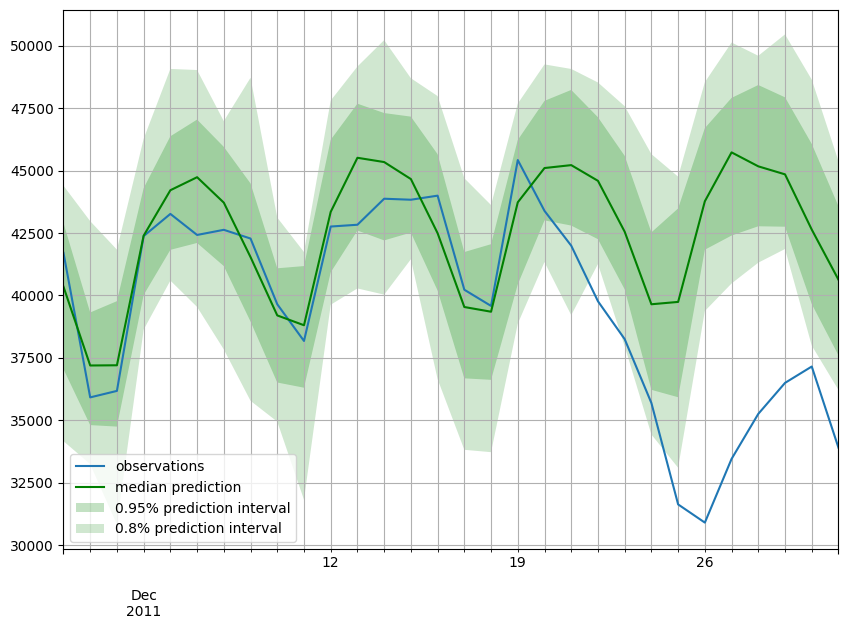

In [55]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_length
    prediction_intervals = (0.8, 0.95)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)
    forecast_entry.plot(intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="lower left")
    plt.show()


plot_prob_forecasts(tss[0], forecasts[0])

with regressors holiday + weather

In [62]:
weather3_year = df_weather[["datetime","temp"]]
weather3_year = weather3_year[(weather3_year["datetime"] >= "2009-01-01")&(weather3_year["datetime"] <= "2011-12-31")]
weather3_year["datetime"] = pd.to_datetime(weather3_year["datetime"])
weather3_year

,datetime,temp
0,2009-01-01,1.2
1,2009-01-02,2.1
2,2009-01-03,-1.7
3,2009-01-04,-2.6
4,2009-01-05,0.0
...,...,...
1090,2011-12-27,10.1
1091,2011-12-28,9.1
1092,2011-12-29,7.5
1093,2011-12-30,6.8


Merge two datasets

In [66]:
daily2

,settlement_date,tsd,is_holiday
0,2009-01-01,38528.395833,1.0
1,2009-01-02,41133.458333,0.0
2,2009-01-03,40667.791667,0.0
3,2009-01-04,41013.958333,0.0
4,2009-01-05,47322.312500,0.0
...,...,...,...
1084,2011-12-27,33447.875000,1.0
1085,2011-12-28,35252.062500,0.0
1086,2011-12-29,36492.541667,0.0
1087,2011-12-30,37148.395833,0.0


In [67]:
merged_df=pd.merge(daily2,weather3_year,left_on=daily2["settlement_date"].dt.date,right_on=weather3_year["datetime"].dt.date,how="inner")
merged_df = merged_df.drop(columns=['key_0', 'datetime'])
merged_df

,settlement_date,tsd,is_holiday,temp
0,2009-01-01,38528.395833,1.0,1.2
1,2009-01-02,41133.458333,0.0,2.1
2,2009-01-03,40667.791667,0.0,-1.7
3,2009-01-04,41013.958333,0.0,-2.6
4,2009-01-05,47322.312500,0.0,0.0
...,...,...,...,...
1084,2011-12-27,33447.875000,1.0,10.1
1085,2011-12-28,35252.062500,0.0,9.1
1086,2011-12-29,36492.541667,0.0,7.5
1087,2011-12-30,37148.395833,0.0,6.8


get the date to index

In [68]:
merged_df["settlement_date"] = pd.to_datetime(merged_df["settlement_date"])


train test split

In [69]:
merged_df.isnull().sum()

settlement_date    0
tsd                0
is_holiday         0
temp               0
dtype: int64

In [70]:
df3 = merged_df.set_index("settlement_date")
df3

,tsd,is_holiday,temp
settlement_date,,,
2009-01-01,38528.395833,1.0,1.2
2009-01-02,41133.458333,0.0,2.1
2009-01-03,40667.791667,0.0,-1.7
2009-01-04,41013.958333,0.0,-2.6
2009-01-05,47322.312500,0.0,0.0
...,...,...,...
2011-12-27,33447.875000,1.0,10.1
2011-12-28,35252.062500,0.0,9.1
2011-12-29,36492.541667,0.0,7.5


In [71]:
train_data = df3[df3.index < split_date]
test_data = df3[df3.index >= split_date]
print(train_data.shape)
print(test_data.shape)

(967, 3)
(122, 3)


In [72]:
estimator = DeepAREstimator(freq=freq,
                            context_length=720,
                            prediction_length=prediction_length,
                            use_feat_dynamic_real =True, # weather temp
                            cardinality = [2],
                            scaling = True,
                            num_layers=3,
                            num_cells=64,
                            trainer=Trainer(epochs=5),)

In [73]:
train_ds = ListDataset([{"start": train_data.index[0],
                              "target": train_data.tsd,
                              "feat_dynamic_real": [train_data.temp],
                              "feat_dynamic_cat": [train_data.is_holiday],
                              }],
                           freq = freq)

test_ds = ListDataset([{"start": test_data.index[0],
                              "target": test_data.tsd,
                              "feat_dynamic_real": [test_data.temp],
                              "feat_dynamic_cat": [test_data.is_holiday],
                              }],
                           freq = freq)


In [ ]:
next(iter(train_ds))

In [75]:
predictor_3 = estimator.train(training_data=train_ds)

100%|██████████| 50/50 [03:24<00:00,  4.08s/it, epoch=5/5, avg_epoch_loss=8.75]


In [76]:
from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,
    predictor=predictor_3,
    num_samples=100,
)


In [77]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [78]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics_3, item_metrics_3 = evaluator(iter(tss), iter(forecasts))

Running evaluation: 1it [00:00,  8.57it/s]


In [ ]:
agg_metrics_3

In [81]:
mape_3 = round(agg_metrics_3['MAPE'],3)
smape_3 = round(agg_metrics_3['sMAPE'],3)
print(f"MAPE: {mape_3}")
print(f"sMAPE: {smape_3}")

MAPE: 0.101
sMAPE: 0.092


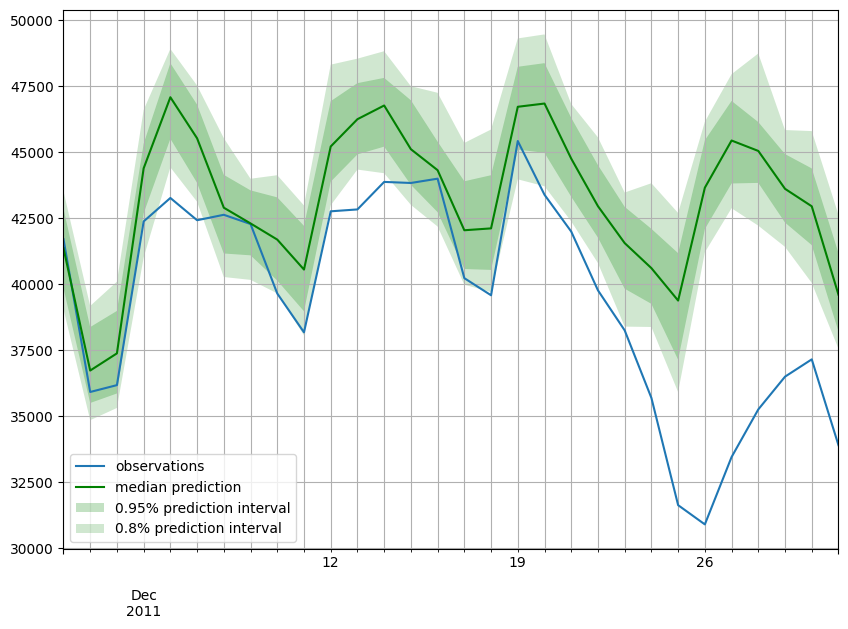

In [82]:
plot_prob_forecasts(tss[0], forecasts[0])